### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<Axes: >

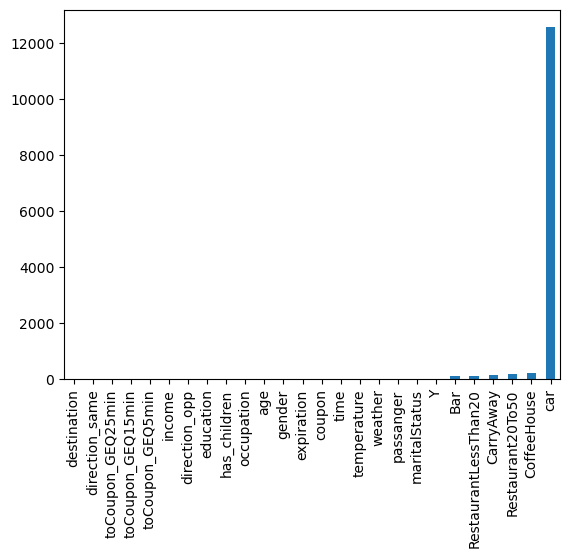

In [8]:
data.isnull().sum().sort_values().plot(kind = 'bar')

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Findings: 
Colum "car" has lots of missing data
Cloums "Bar", "CoffeeHouse","CarryAway", "RestaurantLessThan20" and "Restaurant20To50" have some mising information

<Axes: xlabel='Y'>

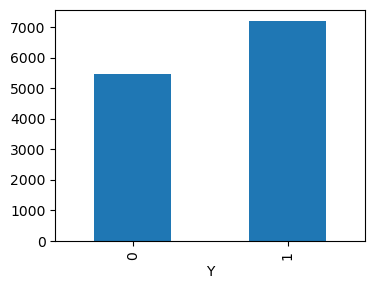

In [21]:
#Since data describes if a cutsomer will accept the coupun  and there is a varable that clearly indicates the value of this variable per enrty ("Y")
#we need to make sure that data brings a good balance of entries for "Yes" or "No"  to make sure data is not skewed
#we create a barchart to see the data distribution for bad and good credit
class_count=data.groupby('Y').size()
class_count.plot(kind='bar', figsize=(4,3))

Findings:
The data looks balanced bewteen People that will acpet te coupon "1" and people that will not accepot the coupun "0"     

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# Since the colum "car" has so many empty values and it does not impact whether a driver is likely to accept a coupon, we will remove this colum 
data.drop(columns=['car'],inplace=True);
# for the colums we misisng some data, the misisng data ratio is small so we decided to remove those rows
New_data=data.dropna()
New_data.info()
# after this steps no more null-data and the data set is completed 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

4. What proportion of the total observations chose to accept the coupon? 



In [8]:
# to see the proportion we calculate the mean 
New_data_mean = New_data['Y'].mean()
print(New_data_mean)

0.5693352098683666


We observed that ~57% of the people will accept the coupon 

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon per category')

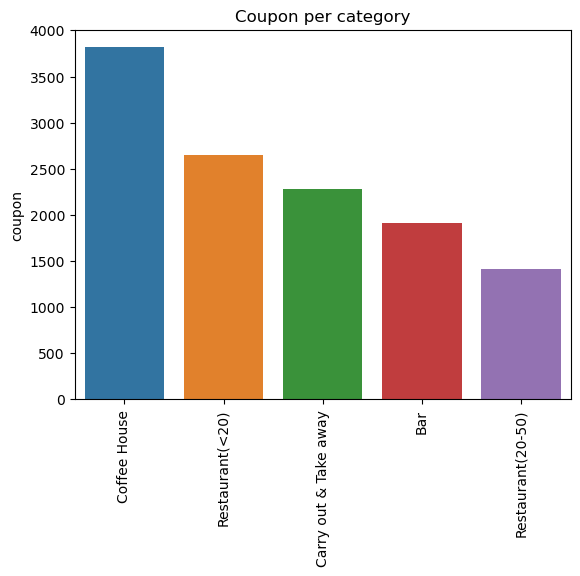

In [10]:
sns.barplot(x=New_data['coupon'].value_counts().index, y=New_data['coupon'].value_counts())
plt.xticks(rotation=90)
plt.title("Coupon per category")

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Coupons per temperature')

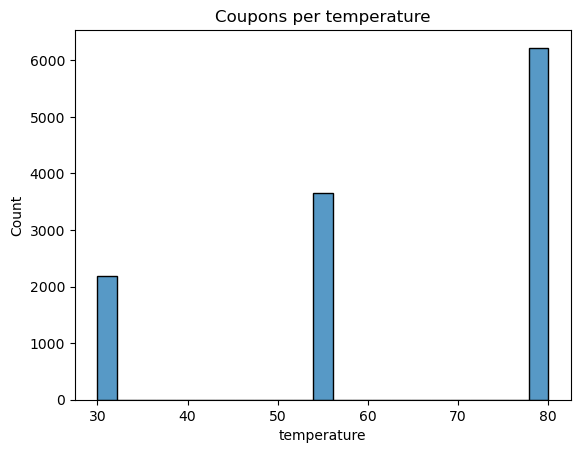

In [16]:
sns.histplot(data = New_data, x='temperature')
plt.title('Coupons per temperature')

Findings:
More coupuns are given when tempertaure is higher 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
DataFrame = New_data.query("coupon=='Bar'")
DataFrame.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [23]:
Bar_mean=DataFrame['Y'].mean()
print(Bar_mean)

0.41191845269210664


Findings:
~41% of bar coupons were accepted 

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [30]:
# calculate teh rate of people that went to a bar 3 or less times 

lessthan3times_rate = len(DataFrame.query('Bar in ["never", "less1", "1~3"]').query('Y == True'))/len(DataFrame.query('Bar in ["never", "less1", "1~3"]'))*100
print(lessthan3times_rate)

# calculate teh rate of people that went to a bar more than 3 times 
morethan3times_rate = len(DataFrame.query('Bar not in ["never", "less1", "1~3"]').query('Y == True'))/len(DataFrame.query('Bar not in ["never", "less1", "1~3"]'))*100
print(morethan3times_rate)



37.26744186046512
76.16580310880829


Findings:
People that went to a bar less than 3 times have  alower acceptance rate (37.2%)than people that went to a bar more tha 3 times (~76.1%)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [34]:
# we filter again by those who go to the bar more than once
drivers_gt1 = DataFrame.query('Bar not in ["never", "less1"]')

# we filter one more time by those over the age of 25
drivers_gt1_gt25yo = drivers_gt1.query('age != "21"')

# everyone else
everyone_else = pd.concat([DataFrame, drivers_gt1_gt25yo]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
drivers_gt1_gt25yo_acceptance_rate = len(drivers_gt1_gt25yo.query('Y == True'))/len(drivers_gt1_gt25yo)*100

print(everyone_else_acceptance_rate)
print(drivers_gt1_gt25yo_acceptance_rate)

33.64737550471063
68.28087167070218


Findings:
Drivers that go to a bar more than once and are over the age of 25 hav an acceptance rate bigger (68.2%) than the rest of the people (33.6%)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [36]:
# we filter again by those who go to the bar more than once
drivers_gt1 = DataFrame.query('Bar not in ["never", "less1"]')

# we apply another filter for those who have passengers that weren't kids
drivers_gt1_adult_passanger = drivers_gt1.query('passanger not in ["Kid(s)", "Alone"]')

# lastly, we apply the filter to those with an occupation other than farming, fishing, forestry
drivers_gt1_adult_passanger_occupation = drivers_gt1_adult_passanger.query('occupation not in ["farming", "fishing", "forestry"]')

# everyone else
everyone_else = pd.concat([DataFrame, drivers_gt1_adult_passanger_occupation]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
drivers_gt1_adult_passanger_occupation_rate = len(drivers_gt1_adult_passanger_occupation.query('Y == True'))/len(drivers_gt1_adult_passanger_occupation)*100

print(everyone_else_acceptance_rate)
print(drivers_gt1_adult_passanger_occupation_rate)

37.836257309941516
71.42857142857143


Findings:
Drivers who go to the bar more than once a month, had passangers that weren't kids 
and occupations other than farming, fishing and forestry have an acceptance rate of 
71.4% compared to everyone else at 37.8% acceptance.    

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [37]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed

# we filter again by those who go to the bar more than once
drivers_gt1 = DataFrame.query('Bar not in ["never", "less1"]')

# we apply another filter for those who have passengers that weren't kids
drivers_gt1_adult_passanger = drivers_gt1.query('passanger not in ["Kid(s)", "Alone"]')

# lastly, we apply filter to those that weren't windowed
drivers_gt1_adult_passanger_not_widowed = drivers_gt1_adult_passanger.query('maritalStatus != "Widowed"')

# acceptance rate - everyone else
everyone_else = pd.concat([DataFrame, drivers_gt1_adult_passanger_not_widowed]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
drivers_gt1_adult_passanger_not_widowed_rate = len(drivers_gt1_adult_passanger_not_widowed.query('Y == True'))/len(drivers_gt1_adult_passanger_not_widowed)*100

print(everyone_else_acceptance_rate)
print(drivers_gt1_adult_passanger_not_widowed_rate)

37.836257309941516
71.42857142857143


Findings:
Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed have an acceptance rate of 71.4% compared to everyone else at 37.8% acceptance.

In [39]:
# go to bars more than once a month and are under the age of 30 

# we already have the bar filter as drivers_gt1

# we apply the filter for those below the age of 30
drivers_gt1_lt30 = drivers_gt1.query('age not in ["26", "21", "below21"]')

# acceptance rate - everyone else
everyone_else = pd.concat([DataFrame, drivers_gt1_lt30]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
drivers_gt1_lt30_rate = len(drivers_gt1_lt30.query('Y == True'))/len(drivers_gt1_lt30)*100

print(everyone_else_acceptance_rate)
print(drivers_gt1_lt30_rate)

37.82477341389728
63.934426229508205


Findings:
Drivers who go to bars more than once a month and are under the age of 30 have an acceptance rate of 
63.9% compared to everyone else at 37.8% acceptance.

In [42]:
# go to cheap restaurants more than 4 times a month with an income less than 50K

# go to cheap restarants more than 4 times a month
cheap_res_gt4 = DataFrame.query('RestaurantLessThan20 not in ["1~3", "less1", "never"]')

# income less than 50k
cheap_res_gt4_lt50k = cheap_res_gt4.query('income not in ["$25000 - $37499", "Less than $12500", "$37500 - $49999", "$12500 - $24999"]')

# acceptance rate - everyone else
everyone_else = pd.concat([DataFrame, cheap_res_gt4_lt50k]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
cheap_res_gt4_lt50k_rate = len(cheap_res_gt4_lt50k.query('Y == True'))/len(cheap_res_gt4_lt50k)*100

print(everyone_else_acceptance_rate)
print(cheap_res_gt4_lt50k_rate)

41.28989361702128
40.64837905236908


Drivers who go to cheap restaurants more than 4 times a month with an income less than 50K have an acceptance rate of 
40.6% compared to everyone else at 41.2% acceptance.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

We find that the acceptance rate falls in the order that they appear:

go to bars more than once a month, had passengers that were not a kid, and were not widowed -> **71.4%** 
go to bars more than once a month and are under the age of 30 -> **63.9%**
go to cheap restaurants more than 4 times a month and income is less than 50K -> **40%**

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

My invetigation will try to find if people going in teh same dircetion a coffe house has  agreater impact for coupon acceptance than than people accepting coupons to a coffe house in a sunny day 

In [49]:
#Coffee house coupon acceptance rate for drivers going in the same direction.

# filter for coffee house coupon
coffee_data = New_data.query('coupon == "Coffee House"')

# Coffee house coupon acceptance rate for drivers going in the same direction.
coffee_same_dir = coffee_data.query('direction_same == 1')

# acceptance rate - everyone else
everyone_else = pd.concat([coffee_data, coffee_same_dir]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == 1'))/len(everyone_else)*100
coffee_same_dir_rate = len(coffee_same_dir.query('Y == True'))/len(coffee_same_dir)*100

print(everyone_else_acceptance_rate)
print(coffee_same_dir_rate)

48.80181347150259
52.6536312849162


Drivers who are going in the same direction as a Coffee House have a coupon acceptance rate
52.6% compared to everyone else at 48.8% acceptance.

In [51]:
# Coffee house coupon acceptance rate for drivers going in a Sunny Weather

# filter for coffee house coupon
coffee_data = New_data.query('coupon == "Coffee House"')

# Coffee house coupon acceptance rate for drivers going in the same direction.
coffee_weather = coffee_data.query('weather == "Sunny"')

# acceptance rate - everyone else
everyone_else = pd.concat([coffee_data, coffee_weather]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
coffee_weather_rate = len(coffee_weather.query('Y == True'))/len(coffee_weather)*100

print(everyone_else_acceptance_rate)
print(coffee_weather_rate)

46.787148594377506
50.090470446320865


Drivers who accepted a Coffee House coupon in a sunny weather have an acceptance rate
50% compared to everyone else at 46.7% acceptance.

my conclusion is that Drivers who are going in the same direction as a Coffee House have a coupon acceptance rate
52.6% compare to drivers that accepoted a house coffe coupon in a sunny Day 

just to compare we calculate the acceptance rate for drivers who accepted a coffe house coupon in a Snowy day

In [52]:
# filter for coffee house coupon
coffee_data = New_data.query('coupon == "Coffee House"')

# Coffee house coupon acceptance rate for drivers going in the same direction.
coffee_weather = coffee_data.query('weather == "Snowy"')

# acceptance rate - everyone else
everyone_else = pd.concat([coffee_data, coffee_weather]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
coffee_weather_rate_Snowy = len(coffee_weather.query('Y == True'))/len(coffee_weather)*100

print(everyone_else_acceptance_rate)
print(coffee_weather_rate_Snowy)

50.014208581983524
42.80701754385965


we can see that either Sunny (50%) or Snowy (42.8%) days have less effect for peoipe acceting ahouse coffre coupon than poeople going in the same dierction (52.6%) 